In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats
import math
import json

## #1
 Построчно​ ​ считать​ ​ *.jsonl​ ​ файл,​ ​ вывести​ ​ все​ ​ типы​ ​ событий,​ ​ подсчитать
количество​ ​ их​ ​ вхождений​ ​ и ​ ​ сохранить​ ​ в ​ ​ файл​ ​ types.json​ .

In [2]:
data = pd.read_json("match-data.jsonl",lines=True)

In [3]:
data.type.unique()

array(['DOTA_COMBATLOG_GAME_STATE', 'player_slot', 'interval', 'cursor',
       'camera', 'CHAT_MESSAGE_DISCONNECT', 'CHAT_MESSAGE_RECONNECT',
       'actions', 'CHAT_MESSAGE_ITEM_PURCHASE', 'courier_spawned',
       'DOTA_COMBATLOG_MODIFIER_ADD', 'DOTA_COMBATLOG_GOLD',
       'name_to_slot', 'DOTA_COMBATLOG_PURCHASE', 'DOTA_COMBATLOG_ITEM',
       'DOTA_COMBATLOG_MODIFIER_REMOVE', 'pings', 'obs',
       'DOTA_COMBATLOG_PLAYERSTATS', 'DOTA_COMBATLOG_DAMAGE',
       'DOTA_COMBATLOG_ABILITY', 'CHAT_MESSAGE_RUNE_PICKUP',
       'DOTA_COMBATLOG_XP', 'DOTA_COMBATLOG_DEATH', 'sen',
       'CHAT_MESSAGE_HERO_KILL', 'CHAT_MESSAGE_FIRSTBLOOD',
       'DOTA_COMBATLOG_FIRST_BLOOD', 'DOTA_COMBATLOG_HEAL',
       'DOTA_COMBATLOG_ABILITY_TRIGGER', 'CHAT_MESSAGE_RUNE_BOTTLE',
       'sen_left', 'obs_left', 'CHAT_MESSAGE_GLYPH_USED',
       'CHAT_MESSAGE_TOWER_KILL', 'DOTA_COMBATLOG_TEAM_BUILDING_KILL',
       'CHAT_MESSAGE_SCAN_USED', 'CHAT_MESSAGE_STREAK_KILL',
       'DOTA_COMBATLOG_KILLSTREAK', 'C

In [4]:
data.type.value_counts().to_json("types.json")

## #2
События​ ​ типа​ ​ “cursor”​ ​ фиксируют​ ​ положение​ ​ курсора​ ​ на​ ​ экране​ ​ игрока.​ ​ Игрок
идентифицируется​ ​ полем​ ​ slot.​ ​ В ​ ​ любом​ ​ матче​ ​ игрок​ ​ располагается​ ​ на​ ​ одном​ ​
из
10​ ​
доступных​ ​ слотов,​ ​ соответственно​ ​ его​ ​ slot​ ​ ∈ [ 0, 9] .​ ​ Все​ ​ остальные​ ​ значения
данного​ ​ поля​ ​ идентифицируют​ ​ комментаторов​ ​ и ​ ​ обсерверов​ ​ матча.​ ​ Для
каждого​ ​ игрока​ ​ необходимо​ ​ нарисовать​ ​ heatmap​ ​ положений​ ​ его​ ​ курсора​ ​ в
течение​ ​ всего​ ​ матча.​ ​ Результат​ ​ сохранить​ ​ в ​ ​ файлы​ ​ heatmap_slot_name.png .

In [5]:
data.slot.dropna().shape[0]/data.shape[0]

0.9513314049793342

Оставим только данные для $slot \in [0,9]$

In [6]:
slot_data = data.dropna(subset=["slot"])
slot_data = slot_data[slot_data.slot.apply(lambda x: x in range(10))]

Сгруппируем данные по полю $slot$

In [7]:
grouped_data = slot_data.groupby(by="slot")

In [8]:
def create_hexbin_image(slot_number,heatmap_data,title=""):
    fig, ax = plt.subplots()
    hex_ax = ax.hexbin(x=heatmap_data['x'], y=heatmap_data['y'],
                       gridsize=25, cmap="jet")
    ax.set_title(title)
    fig.colorbar(hex_ax)
    #В примере ось х инвертирована
    plt.gca().invert_xaxis()
    plt.savefig("heatmap_{0}.png".format(slot_number))

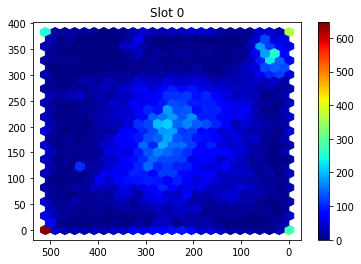

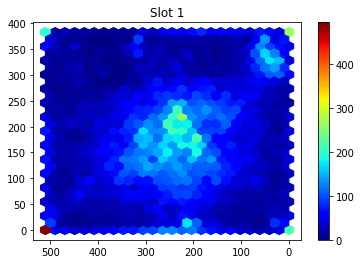

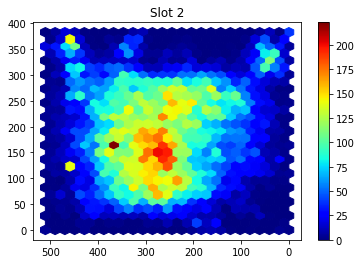

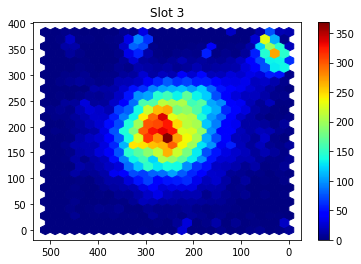

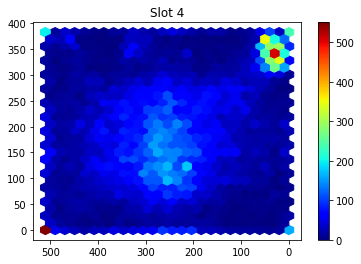

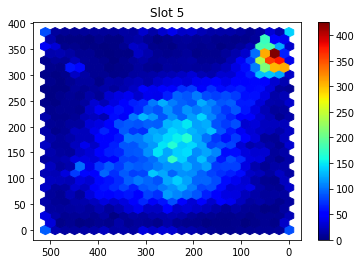

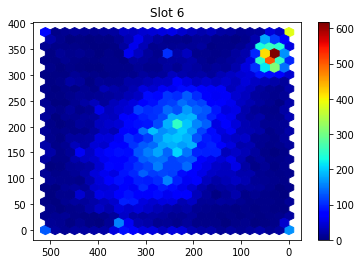

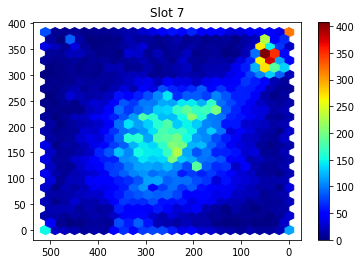

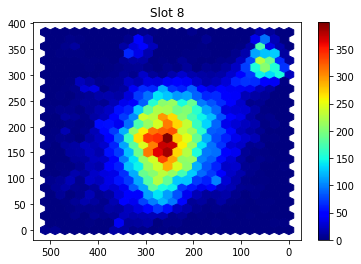

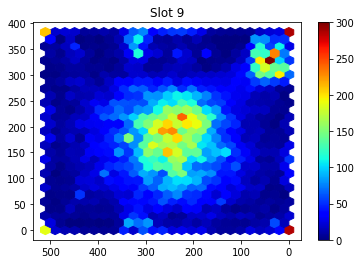

In [9]:
for i in range(10):
    user_data = grouped_data.get_group(i)
    heatmap_data = user_data[user_data.type == "cursor"][["x","y"]]
    create_hexbin_image(i,heatmap_data,title="Slot {}".format(i))

## #3
Портал​ ​ https://www.opendota.com/​​ ​ предоставляет​ ​ доступ​ ​ к ​ ​ базе​ ​ данных​ ​ с
анализами​ ​ профессиональных​ ​ матчей​ ​ Dota​ ​ 2.​ ​ Необходимо​ ​ составить
SQL-запросы​ ​ к ​ ​ базе​ ​ данных​ ​ для​ ​ выгрузки​ ​ 1000​ ​ профессиональных​ ​ матчей​ ​ за
последний​ ​ патч​ ​ 7.07​ ​ с ​ ​ https://www.opendota.com/explorer​ , ​ ​ а ​ ​ также​ ​ 1000
последних​ ​ матчей​ ​ из​ ​ прошлого​ ​ патча​ ​ 7.06.​ ​ Среди​ ​ всех​ ​ матчей​ ​ выбрать​ ​ те,​ ​ в
которых​ ​ есть​ ​ герой​ ​ Anti-Mage​ ​ (hero_id​ ​ = ​ ​ 1).​ ​ Для​ ​ данного​ ​ героя​ ​ нужно​ ​ вывести
значение​ ​ времени​ ​ покупки​ ​ предмета​ ​ battle​ ​ fury​ ​ (‘bfury’​ ​ в ​ ​ purchase_log)​ ​ от​ ​ начала
матча.​ ​ Далее​ ​ необходимо​ ​ провести​ ​ статистический​ ​ тест​ ​ для​ ​ проверки​ ​ гипотезы
о​ ​ том,​ ​ что​ ​ в ​ ​ среднем​ ​ время​ ​
покупки​ ​ предмета​ ​ для​ ​ обоих​ ​ патчей​ ​ одинаково.
API:​ ​ https://docs.opendota.com/
Схема​ ​ БД:​ ​ https://github.com/odota/core/blob/master/sql/create_tables.sql

In [10]:
import requests

def parse_response(response):
    rows = pd.read_json(response.content.decode("utf-8"),lines=True)["rows"][0]
    result = pd.DataFrame(rows)
    return result

def read_sql_from_file(filename):
    with open(filename) as file:
        sql = file.read().replace('\n',' ')
    return sql

response = requests.get('https://api.opendota.com/api/explorer',params={"sql":read_sql_from_file("select_antimage_7_07_patch.sql")})
print(response)
last_patch_data = parse_response(response)
response = requests.get('https://api.opendota.com/api/explorer',params={"sql":read_sql_from_file("select.sql")})
print(response)
prev_patch_data = parse_response(response)

<Response [200]>
<Response [200]>


In [11]:
last_patch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
match_id        132 non-null int64
patch           132 non-null object
purchase_log    131 non-null object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [12]:
prev_patch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
match_id        333 non-null int64
patch           333 non-null object
purchase_log    327 non-null object
dtypes: int64(1), object(2)
memory usage: 7.9+ KB


In [13]:
def extract_bfury_logs(log):
    if not (log is None):
        bfury_logs = list(filter(lambda x: "bfury" == x["key"],log))
        if(len(bfury_logs)<1):
            return None
        return bfury_logs[0]["time"]
    else:
        return None

In [15]:
last_patch_data["bfury_log"] = last_patch_data.purchase_log.apply(extract_bfury_logs)
prev_patch_data["bfury_log"] = prev_patch_data.purchase_log.apply(extract_bfury_logs)
last_patch_data.dropna(inplace=True)
prev_patch_data.dropna(inplace=True)

In [16]:
prev_patch_data.bfury_log

0       929.0
1       838.0
2      1229.0
3      1077.0
4      1050.0
5      1042.0
6      1166.0
7       894.0
8       913.0
9       760.0
10     1017.0
11      933.0
12      899.0
13      878.0
14      824.0
15      664.0
16      938.0
17     1006.0
18      944.0
19      965.0
20      987.0
21      929.0
22      932.0
23     1029.0
24      664.0
25      799.0
26      919.0
27      837.0
28      993.0
29     1016.0
        ...  
301     976.0
302    1051.0
303    1193.0
304    1025.0
305    1004.0
306     999.0
307    1161.0
308     815.0
309    1124.0
310    1047.0
311     857.0
312    1335.0
313     987.0
314     791.0
315     872.0
316     861.0
317     992.0
318     942.0
319     935.0
320     993.0
321     959.0
323    1050.0
324     849.0
326    1133.0
327     846.0
328     911.0
329     949.0
330    1177.0
331     926.0
332    1003.0
Name: bfury_log, Length: 321, dtype: float64

In [17]:
prev_patch_data.bfury_log.describe()

count     321.000000
mean      968.685358
std       128.383498
min       664.000000
25%       875.000000
50%       967.000000
75%      1041.000000
max      1413.000000
Name: bfury_log, dtype: float64

In [18]:
last_patch_data.bfury_log.describe()

count     127.000000
mean      857.598425
std       124.647392
min       587.000000
25%       754.000000
50%       852.000000
75%       933.000000
max      1297.000000
Name: bfury_log, dtype: float64

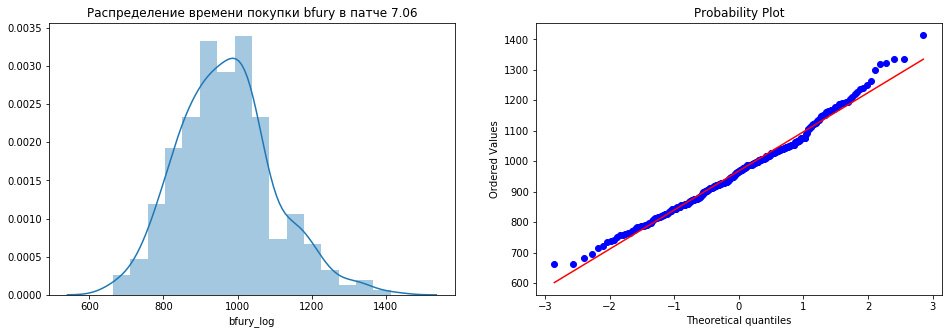

In [19]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
ax = sns.distplot(prev_patch_data.bfury_log,ax=axes[0])
ax.set_title("Распределение времени покупки bfury в патче 7.06")
ax.plot()
qqplot = stats.probplot(prev_patch_data.bfury_log, dist="norm", plot=axes[1])

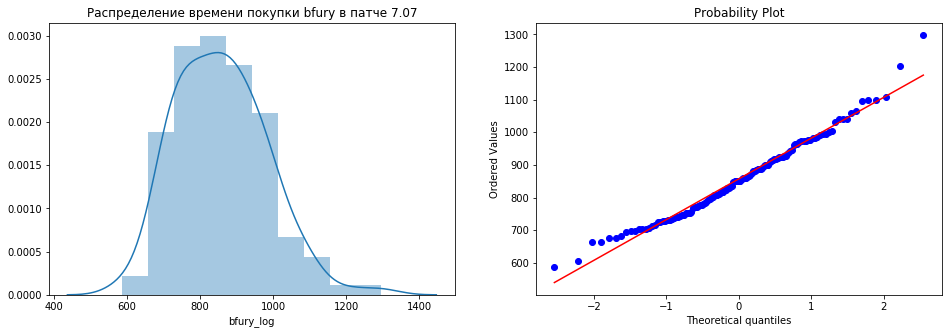

In [20]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
ax = sns.distplot(last_patch_data.bfury_log,ax=axes[0])
ax.set_title("Распределение времени покупки bfury в патче 7.07")
ax.plot()
qqplot = stats.probplot(last_patch_data.bfury_log, dist="norm", plot=axes[1])

[]

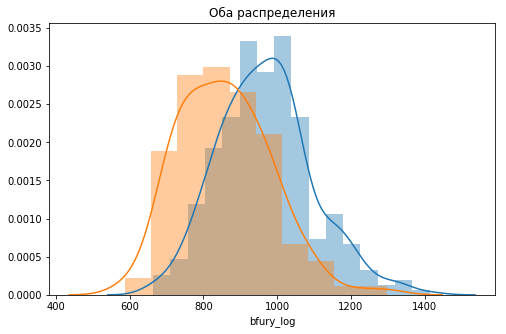

In [21]:
fig,ax = plt.subplots(figsize=(8,5))
sns.distplot(prev_patch_data.bfury_log,ax=ax)
sns.distplot(last_patch_data.bfury_log,ax=ax)
ax.set_title("Оба распределения")
ax.plot()

**Гипотеза: распределения времени покупки bfury является нормальным. Уровень значимости 0.05 **  
Проверим с помощью критерия Шапиро-Уилка

In [22]:
from scipy.stats import shapiro

shapiro(prev_patch_data.bfury_log)

(0.9871982932090759, 0.006135671399533749)

In [23]:
shapiro(last_patch_data.bfury_log)

(0.9794225692749023, 0.050184376537799835)

** Нет оснований отклонить гипотезу о соответствии данных нормальному распределению(для обоих патчей) ** 

 **Гипотеза: распределения имеют одинаковую дисперсию. Уровень значимости 0.05**  
 Проверим с помощью F test

In [24]:
F_stat = prev_patch_data.bfury_log.var()/last_patch_data.bfury_log.var()

df1 = prev_patch_data.bfury_log.shape[0] - 1 
df2 = last_patch_data.bfury_log.shape[0] - 1 
p_value = stats.f.cdf(F_stat,df1,df2)

print(p_value)

0.64554752048


**Нет оснований для отклонения гипотезы об идентичности дисперсий двух распределений**

Таким образом имеет место допущение о том, что мы имеем два нормальных распределений с одинаковой дисперсий.

**Гипотеза: распределения имеют одинаковое среднее. Уровень значимости 0.05**  
Используем t test для проверки

In [25]:
stats.ttest_ind(prev_patch_data.bfury_log,last_patch_data.bfury_log)

Ttest_indResult(statistic=8.3217854503274591, pvalue=1.0667201136564248e-15)

**Гипотеза об идентичности средних отклоняется, т.к. pvalue < 0.05**

## #3
События​ ​ “type”:”interval”​ ​ фиксируют​ ​ состояние​ ​ всех​ ​ героев​ ​ в ​ ​ матче​ ​ дважды​ ​ в
секунду.​ ​ Необходимо​ ​ построить​ ​ линейную​ ​ регрессию​ ​ общей​ ​ стоимости
персонажа​ ​ (поле​ ​ gold​ ​ в ​ ​ событиях​ ​ этого​ ​ типа)​ ​ на​ ​ время​ ​ матча​ ​ g old = a * t ime + b .
Значимы​ ​ ли​ ​ коэффициенты​ ​ регрессии?​ ​ Нужно​ ​ ли​ ​ использовать​ ​ intercept​ ​ в
данной​ ​ модели?​ ​ Какой​ ​ смысл​ ​ в ​ ​ терминах​ ​ игры​ ​ имеет​ ​ коэффициент​ ​ наклона?

In [26]:
interval_data = data[data.type == "interval"][["time","gold","slot"]]
interval_data.shape

(68050, 3)

In [27]:
interval_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68050 entries, 12 to 1320293
Data columns (total 3 columns):
time    68050 non-null float64
gold    68050 non-null float64
slot    68050 non-null float64
dtypes: float64(3)
memory usage: 2.1 MB


In [28]:
interval_data.describe()

,time,gold,slot
count,68050.000000,68050.000000,68050.000000
mean,1709.867059,6187.591741,4.500000
std,982.223902,6828.073297,2.872302
min,8.833338,0.000000,0.000000
25%,859.345100,136.000000,2.000000
50%,1709.870700,4235.000000,4.500000
75%,2560.366700,9757.750000,7.000000
max,3410.863800,30714.000000,9.000000


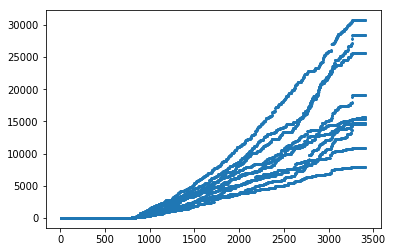

In [29]:
plt.scatter(interval_data.time,interval_data.gold,s=1)

Из этого графика можно сделать два вывода:
* необходимо строить отдельную модель для каждого из игроков
* до определённого момента стоимость остаётся на нуле, для построения модели эти данные лучше не использовать  

Найдём время, когда стоимость персонажей начинает расти

In [30]:
interval_data.sort_values(by="time",inplace=True)

In [31]:
for i in range(interval_data.shape[0]):
    row = interval_data.iloc[i,:]
    if(row["gold"]>0):
        gold_start_grow_time = row["time"]
        break
        
print(gold_start_grow_time)

799.89294


Выберем только те данные, для которых $time>799.89294$

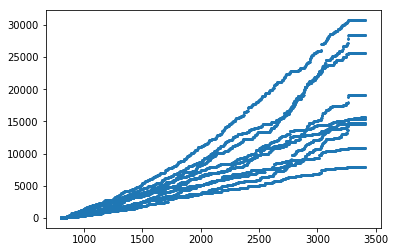

In [32]:
sign_interval_data = interval_data[interval_data.time>gold_start_grow_time]
plt.scatter(sign_interval_data.time,sign_interval_data.gold,s=1)

In [33]:
groupby_slot_data = sign_interval_data.groupby(by="slot")

In [34]:
def plot_model_and_data(user_gold_time,lin_model,title,ax=None):
    time = np.linspace(gold_start_grow_time,3500,400)
    gold = lin_model.coef_[0][0]*time + lin_model.intercept_[0]
    if(ax is None):
        fig,ax = plt.subplots()
    ax.plot(time,gold)
    ax.set_title(title)
    ax.scatter(user_gold_time.time,user_gold_time.gold,color="green",alpha=0.1,s=0.5)

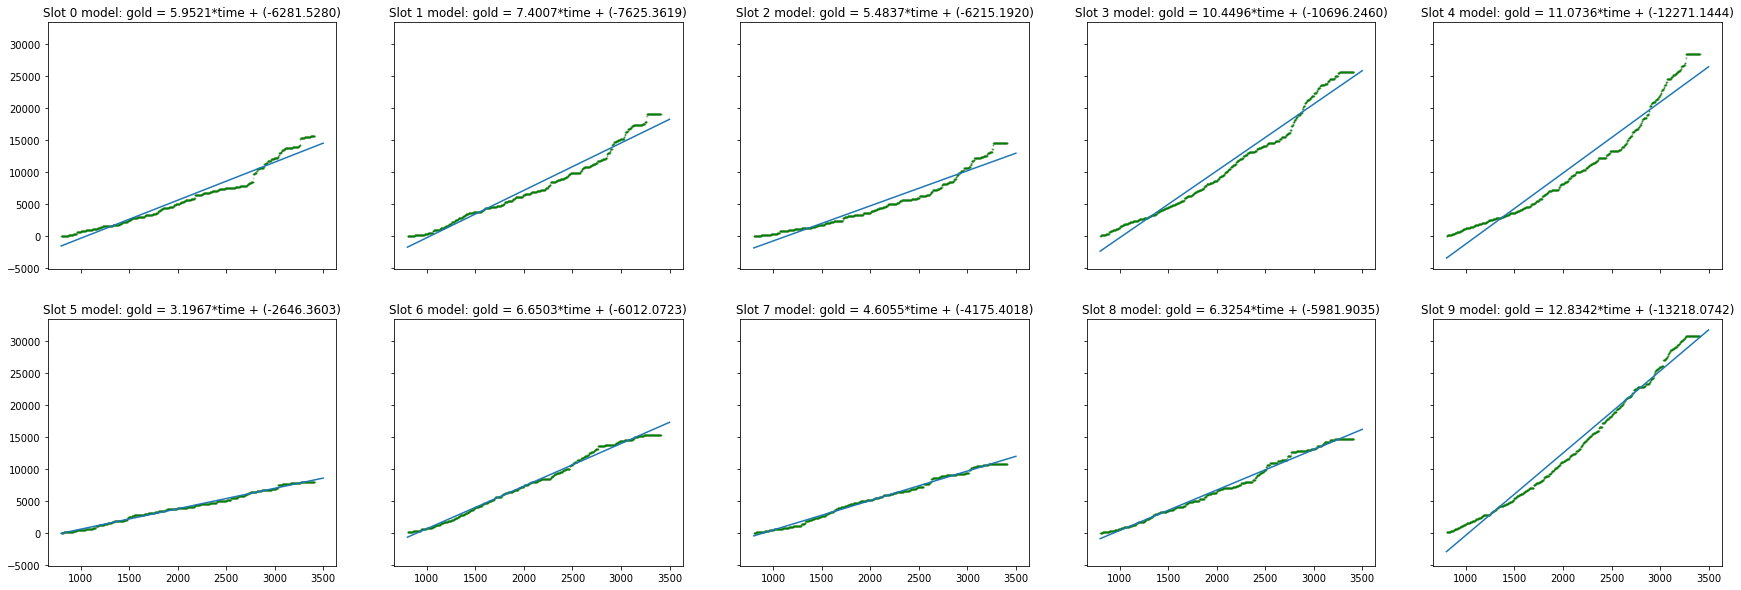

In [35]:
from sklearn.linear_model import LinearRegression

fig,axes = plt.subplots(2,5,figsize=(30,10),sharex="all",sharey="all")
axes = np.r_[axes[0],axes[1]]
for i in range(10):
    user_gold_time = groupby_slot_data.get_group(i)
    lin_model = LinearRegression()
    lin_model.fit(user_gold_time.time.as_matrix().reshape(-1,1),user_gold_time.gold.as_matrix().reshape(-1,1))
    title = "Slot {} model: gold = {:5.4f}*time + ({:5.4f})".format(i,lin_model.coef_[0][0],lin_model.intercept_[0])
    plot_model_and_data(user_gold_time,lin_model,title,ax=axes[i])

### Проверка коэффициентов

Проверка на стат. значимость с уровнем значимости 0.05

Имеем модель вида $y = a + bx$

**Гипотезы**
 * a = 0
 * b = 0
 

In [36]:
alpha = 0.05

In [37]:
import statsmodels.api as sm

/home/vladsafronov/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
def print_summary(model_result): 
    print("-"*30)
    print("Slot {}".format(i))
    print("Модель: gold = {time}*time + ({Intercept})".format(**model_result.params))

    print()
    if(model_result.pvalues["Intercept"]<alpha):
        print("Гипотеза a=0 отклоняется ")
    else:
        print("Нет оснований отклонить гипотезу a=0")

    if(model_result.pvalues["time"]<alpha):
        print("Гипотеза b=0 отклоняется ")
    else:
        print("Нет оснований отклонить гипотезу a=0")


    print("\nДоверительные интервалы")
    conf_int_matrix = model_result.conf_int().as_matrix()
    print("Для a ({};{})".format(*conf_int_matrix[0,:]))
    print("Для b ({};{})".format(*conf_int_matrix[1,:]))
    print("-"*30)

In [39]:
for i in range(10):
    user_gold_time = groupby_slot_data.get_group(i)
    model = sm.OLS.from_formula("gold ~ time ", data=user_gold_time)
    result = model.fit()
    print_summary(result)

------------------------------
Slot 0
Модель: gold = 5.9520760330986064*time + (-6281.5280215543835)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-6360.069881468193;-6202.986161640574)
Для b (5.916957128184791;5.987194938012422)
------------------------------
------------------------------
Slot 1
Модель: gold = 7.400729467023423*time + (-7625.361887320462)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-7708.1825165752425;-7542.541258065682)
Для b (7.363697369656581;7.437761564390264)
------------------------------
------------------------------
Slot 2
Модель: gold = 5.483657296516706*time + (-6215.192011592628)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-6305.437255980445;-6124.94676720481)
Для b (5.443305385318553;5.52400920771486)
------------------------------
------------------------------
Slot 3
Модель: gold = 10.449619282796183*time + (-10696.246005716373)

Гип

#### Модель для всех игроков

------------------------------
Slot 9
Модель: gold = 12.834157247403198*time + (-13218.074160957029)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-13315.65398016385;-13120.494341750207)
Для b (12.79052578265316;12.877788712153235)
------------------------------


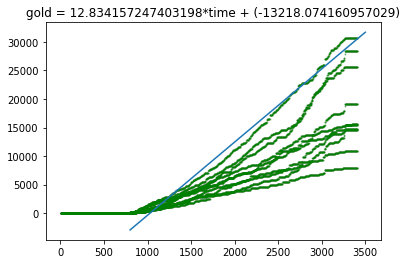

In [40]:
model = sm.OLS.from_formula("gold ~ time ", data=user_gold_time)
result = model.fit()
print_summary(result)
plot_model_and_data(interval_data,lin_model,"gold = {time}*time + ({Intercept})".format(**result.params))

**Выводы:** 
* Коэффициенты регрессии значимы с уровнем значимости 0.05.  

* В данной модели нужно использовать intercept, т.к. стоимость всех героев в начале игры нулевая и это начинает изменятся после определённого момента времени, чтобы модель соответствовала данным, график необходимо сдвигать на этот коэффициент.

* Коэффициент наклона является показателем, который может отражать активность игрока и значимость его персонажа в игре. Например для carry данный коэффициент должен превышать коэффициент support персонажа. Вообще говоря, этот же коэфициент может также отражать способность игрока фармить. 

* Если же строить модель для всех игроков, то данный коэффициент может показывать уровень динамики матча по сравнению с другими матчами.

# #5

В​ ​ логах​ ​ матча​ ​ имеются​ ​ события​ ​ “type”:​ ​ “DOTA_COMBATLOG_DEATH”,​ ​ которые
содержат​ ​ информацию​ ​ о ​ ​ смерти​ ​ юнитов​ ​ на​ ​ карте.​ ​ В ​ ​ случае,​ ​ когда​ ​ юнит
является​ ​ героем,​ ​ полезно​ ​ знать​ ​ время​ ​ нападения​ ​ и ​ ​ продолжительность
процесса​ ​ убийства.​ ​ Задача​ ​
заключается​ ​ в ​ ​ том,​ ​ чтобы​ ​ для​ ​ всех​ ​ убийств персонажей​ ​ на​ ​ карте​ ​ определить​ ​ те​ ​ самые​ ​ время​ ​ нападения​ ​ и
продолжительность,​ ​ а ​ ​ также​ ​ список​ ​ нападавших.​ ​ В ​ ​ этом​ ​ Вам​ ​ помогут​ ​ события
“type”:”DOTA_COMBATLOG_DAMAGE”.  

Необходимо определить как разделять нападения друг от друга.  
Пик распределения для промежутков времени между событиями DOTA_COMBATLOG_DAMAGE должнен находится возле нуля, так как в большинстве случаев, в рамках одного нападения должно генерироваться большое количество событий DOTA_COMBATLOG_DAMAGE с минимальной задержкой.  
Вычислим промежутки времени между событиями DOTA_COMBATLOG_DAMAGE для каждого героя и построим их гистограмму.

In [47]:
death_log = data[data.type=="DOTA_COMBATLOG_DEATH"]
heroes_death_log = death_log[death_log.targethero == 1.0].dropna(axis=1)
combatlog_data  = data[data.type=="DOTA_COMBATLOG_DAMAGE"].dropna(axis=1)

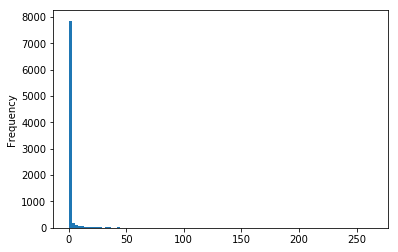

In [49]:
target_heroes_names = heroes_death_log.targetname.unique()
kill_stats = []
time_diffs = []

for hero in target_heroes_names:
    hero_combatlog = combatlog_data[combatlog_data.targetname==hero]
    combat_time = hero_combatlog.time.as_matrix()
    for j in range(len(combat_time)-1):
        time_diffs.append(combat_time[j+1] - combat_time[j])
            
time_diffs = pd.Series(time_diffs)
time_diffs.plot.hist(bins=100)

Возле 0 находится пик распределения, что согласуется с тем, что между событиями DOTA_COMBATLOG_DAMAGE должна быть минимальна.

In [50]:
time_diffs.describe()

count    8679.000000
mean        2.765654
std        13.017601
min         0.000000
25%         0.100300
50%         0.334400
75%         0.903100
max       264.135500
dtype: float64

Построим график роста значений квантилей

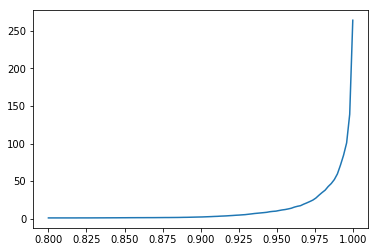

In [90]:
q_levels = np.linspace(0.8,1,num=100)
quantiles_values = []
for q in q_levels:
    quantiles_values.append(time_diffs.quantile(q=q))
    
plt.plot(q_levels,quantiles_values)

По графику видно, что значения квантилей резко возрастают после квантиля 0.925 

In [97]:
time_diffs.quantile(q=0.925)

4.73719500000014

**Будем считать, что персонаж не находится в бою, если не получает урона от героев в течении 5 секунд**  

In [98]:
DELAY = 5

In [99]:
def find_start_killing_time(combat_time,delay):
    start_killing_time = combat_time[0]
    if last_hero_death_time - combat_time[-1]>delay:
        start_killing_time = last_hero_death_time
    else:
        for i in range(len(combat_time)-1,-1,-1):
            if combat_time[i] - combat_time[i-1] > DELAY:
                start_killing_time = combat_time[i]
                break
    return start_killing_time

In [100]:
target_heroes_names = heroes_death_log.targetname.unique()
kill_stats = []

for hero in target_heroes_names:
    hero_combatlog = combatlog_data[combatlog_data.targetname==hero]
    hero_death_log = heroes_death_log[heroes_death_log.targetname==hero]
    
    for i in range(hero_death_log.shape[0]):
        killer = hero_death_log.iloc[i,:]["attackername"]
        last_hero_death_time = hero_death_log.iloc[i,:]["time"]
        
        if(i==0):
            prev_hero_death_time = 0
        else:
            prev_hero_death_time = hero_death_log.iloc[i-1,:]["time"]
            
        live_combat_events_log = hero_combatlog[(hero_combatlog.time > prev_hero_death_time) & \
                                                (hero_combatlog.time < last_hero_death_time)]

        combat_time = live_combat_events_log.time.as_matrix()
        start_killing_time = find_start_killing_time(combat_time,DELAY)
        
        killing_combats = live_combat_events_log[live_combat_events_log.time>=start_killing_time]
        kill_participants = list(killing_combats[killing_combats.attackerhero==1.0].attackername.unique())

        if not (killer in kill_participants):
            kill_participants.append(killer)

        result = {"kill_participants":kill_participants,
                  "targethero":hero,
                  "start_time":start_killing_time,
                  "end_time":last_hero_death_time}
        
        kill_stats.append(result)

In [102]:
import json
with open("kills.json","w") as file:
    file.write(json.dumps(kill_stats))